<a href="https://colab.research.google.com/github/takioo8/Leaf_disease_detection/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 969 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 318s 10s/step - accuracy: 0.5579 - loss: 0.6773 - val_accuracy: 0.9393 - val_loss: 0.3112
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 301s 10s/step - accuracy: 0.8234 - loss: 0.3987 - val_accuracy: 0.8344 - val_loss: 0.3038
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 261s 9s/step - accuracy: 0.8679 - loss: 0.3169 - val_accuracy: 0.9368 - val_loss: 0.1603
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 318s 10s/step - accuracy: 0.9319 - loss: 0.1942 - val_accuracy: 0.9785 - val_loss: 0.0998
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 309s 10s/step - accuracy: 0.9417 - loss: 0.1539 - val_accuracy: 0.9381 - val_loss: 0.1350
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 308s 10s/step - accuracy: 0.9484 - loss: 0.1573 - val_accuracy: 0.9823 - val_loss: 0.0658
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 258s 8s/step - accuracy: 0.9275 - loss: 0.1795 - val_accuracy: 0.9912 - val_loss: 0.0464
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 290s 9s/step - accuracy: 0.9427 - loss: 0.1450 - val_accuracy: 0.902

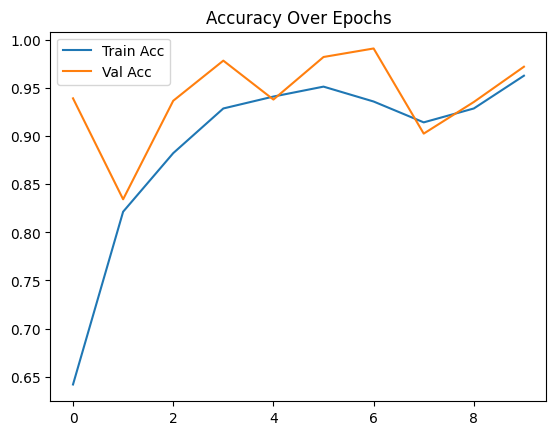

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Parameters
INIT_LR = 0.001
EPOCHS = 10
BS = 32
IMG_SIZE = (128, 128)

# Paths
train_path = "leaf_dataset/train"
test_path = "leaf_dataset/test"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BS,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BS,
    class_mode='binary'
)

# CNN model
model = Sequential([
    Input(shape=(*IMG_SIZE, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=EPOCHS
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving saluyot-jute-leaves-1296x728-header.jpg to saluyot-jute-leaves-1296x728-header.jpg


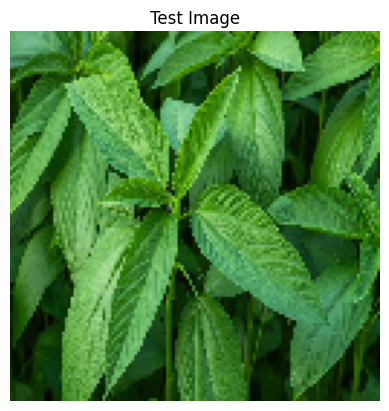

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with the uploaded filename
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize like training data
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

In [ ]:
pred = model.predict(img_array)[0][0]

if pred > 0.5:
    print("Prediction: Healthy Leaf 🌿❌")
else:
    print("Prediction: Diseased Leaf 🌿✅")

print(f"Confidence: {pred:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Healthy Leaf 🌿❌
Confidence: 1.00
